# Homework 4 Solutions 
## Testing the RANDU generator
Below is the definition of the IBM LCM that produces "random" numbers

In [53]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

def randu(N,seed=100):
    N = int(N)
    coef = 65539
    bigint = 2**31
    r = np.zeros(N+1)
    r[0] = seed
    for i in range(1,N+1):
        r[i] = ((coef*r[i-1])%bigint)
        
    return r/bigint

Now lets calculate the _kth_ moment and the autocorrelation among the random numbers generated by this lcm
### Moments

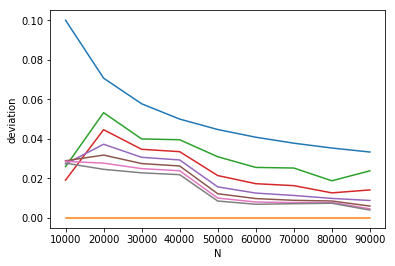

In [76]:
def moment(r,k):
    knumbers = []
    for n in r:
        knumbers.append(n**k)
    return sum(knumbers)/len(r)
nbase=10000
nn = 9
kk = 7
dev = np.zeros((nn,kk))
N = np.zeros(nn)
for k in range(0,nn):
    N[k] = int((k+1)*nbase)
for n in range(0,nn):
    rd = randu(N[n])
    for k in range(0,kk):
        M = moment(rd,k)
        dev[n,k] = np.sqrt(abs(M**2-1/(k+1)**2))
pyplot.plot(N,10/np.sqrt(N))
pyplot.xlabel("N")
pyplot.ylabel("deviation")
for k in range(0,kk):
    pyplot.plot(N,dev[:,k])
    
    

There doesn't seem to be any glaring problems here with this test.

### Autocorrelations
If the numbers produced by the LCM are random, then the autocorrelation for any lag, _m_ should fall below the integration of the uniform joint probability distribution $$\int _0^1 {dx \int _0^1{dy P(x,y)xy}}=\frac{1}{4}.$$

In [70]:
rd=randu(10000)
def autocorr(r,m):
    ac = zeros(len(r))
    for k in range(0,len(r)-m):
        
    

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000.])

## Metropolis Algorithm

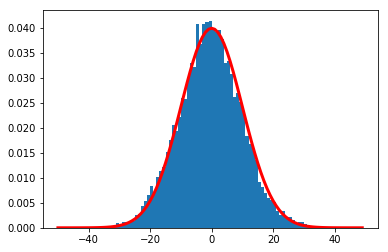

In [78]:
def metropolis(xold,delta):
    sigma = 10.
    sigma2 = sigma**2
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew


N = 10000
delta=2
x = np.zeros(N)
sigma = 10.
sigma2 = sigma**2

# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xwalker = metropolis(xwalker,delta)
###
x[0] = xwalker

for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0,delta)
    x[i] = metropolis(x0,delta)

binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);